In [31]:
import csv
from langdetect import detect
import re

import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
df=pd.read_csv('coursera_data.csv')

In [33]:
df

,Course Name,Company Offering,Skills Gained,Ratings,Number of Ratings
0,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business Co...",4.8,141000
1,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, C...",4.8,26000
2,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manage...",4.8,25000
3,Machine Learning,Multiple educators,"Machine Learning, Machine Learning Algorithms,...",4.9,21000
4,IBM Applied AI,IBM,"Machine Learning, Deep Learning, Machine Learn...",4.6,49000
...,...,...,...,...,...
710,Building AI Applications with Watson APIs,IBM,"Cloud API, Cloud Applications, Cloud Computing...",4.3,741
711,Introduction to Systems Engineering,University of Colorado Boulder,"Leadership and Management, Risk Management",4.9,36
712,Introduction to Portfolio Construction and Ana...,EDHEC Business School,"Computer Programming, Finance, Investment Mana...",4.8,4000
713,Teach English Now! Capstone Project 1,Arizona State University,Planning,4.9,2000


In [34]:
df.shape

(715, 5)

In [35]:
df.isnull().sum()

Course Name          0
Company Offering     0
Skills Gained        0
Ratings              0
Number of Ratings    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course Name        715 non-null    object 
 1   Company Offering   715 non-null    object 
 2   Skills Gained      715 non-null    object 
 3   Ratings            715 non-null    float64
 4   Number of Ratings  715 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 28.1+ KB


In [37]:
def filter_english_instances(df, column_name='Course Name', primary_language='en'):
    for index, row in df.iterrows():
        instance = row[column_name]
        try:
            detected_language = detect(instance)
            if detected_language != primary_language:
                df = df.drop(index)
        except:
            pass
    return df

In [38]:
df=filter_english_instances(df)

In [39]:
df = df[df['Number of Ratings'] != 0]
df.to_csv('coursera_data.csv', index=False)

In [40]:
df = df.dropna(subset=['Skills Gained'])
df.to_csv('coursera_data.csv', index=False)

Histogram Plotting of ratings

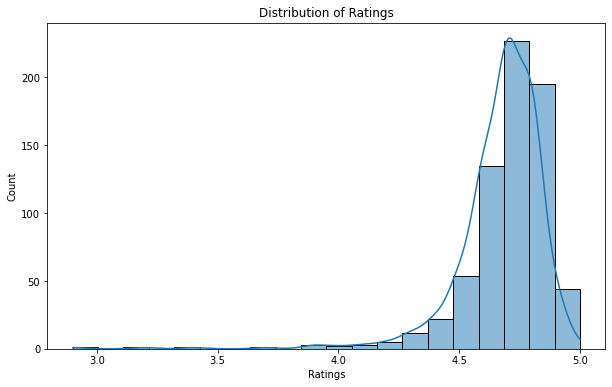

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=20, kde=True)
plt.xlabel('Ratings')
plt.title('Distribution of Ratings')
plt.show()

Scatter plot

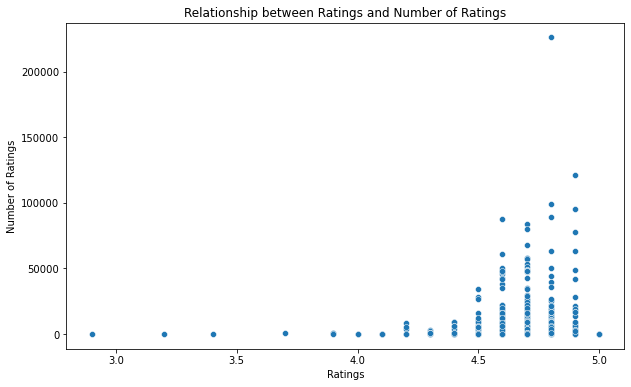

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Number of Ratings', data=df)
plt.title('Relationship between Ratings and Number of Ratings')
plt.show()

Correlation Matrix

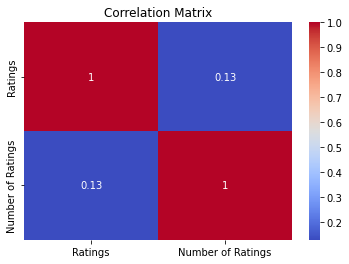

In [61]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)

company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

Leadership and Management    250
Data Analysis                187
Computer Programming         165
Communication                144
Critical Thinking            132
                            ... 
Bayesian Network               1
Markov Model                   1
Spatial Data Analysis          1
Knitr                          1
Business                       1
Length: 335, dtype: int64
IBM                           83
Google                        58
University of Pennsylvania    44
DeepLearning.AI               36
Google Cloud                  30
                              ..
University of Leeds            1
UiPath                         1
Peking University              1
Yonsei University              1
SAS                            1
Name: Company Offering, Length: 128, dtype: int64


In [45]:
company_distribution = df['Company Offering'].value_counts()
print(company_distribution)

IBM                           83
Google                        58
University of Pennsylvania    44
DeepLearning.AI               36
Google Cloud                  30
                              ..
University of Leeds            1
UiPath                         1
Peking University              1
Yonsei University              1
SAS                            1
Name: Company Offering, Length: 128, dtype: int64


In [46]:
skills = df['Skills Gained'].str.split(', ', expand=True).stack().value_counts()
print(skills)

Leadership and Management    250
Data Analysis                187
Computer Programming         165
Communication                144
Critical Thinking            132
                            ... 
Bayesian Network               1
Markov Model                   1
Spatial Data Analysis          1
Knitr                          1
Business                       1
Length: 335, dtype: int64


In [47]:

skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill')


df = df.join(skills_df)


company_skill_counts = df.groupby(['Company Offering', 'Skill']).size().reset_index(name='Count')


top_skills_by_company = company_skill_counts.groupby('Company Offering').apply(lambda x: x.nlargest(5, 'Count'))

overall_top_skills = top_skills_by_company.groupby('Skill')['Count'].sum().nlargest(5)

print("Top 5 skills gained overall (skill and count of companies):")
print(overall_top_skills)

Top 5 skills gained overall (skill and count of companies):
Skill
Leadership and Management    153
Data Analysis                121
Computer Programming         114
Python Programming            86
Communication                 80
Name: Count, dtype: int64


In [48]:
filtered_df = df[(df['Ratings'] > 4.5) & (df['Number of Ratings'] > 100000)]
course_names = filtered_df['Course Name'].unique()

print("Courses with ratings greater than 4.5 and number of ratings greater than 100000:")
for course in course_names:
    print(course)

Courses with ratings greater than 4.5 and number of ratings greater than 100000:
Neural Networks and Deep Learning
Programming for Everybody (Getting Started with Python)


In [49]:
skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Skill_Obtained')

df = df.join(skills_df)
company_skill_counts = df.groupby(['Company Offering', 'Skill_Obtained']).size().reset_index(name='Count')
company_skill_counts_filtered = company_skill_counts[company_skill_counts['Count'] > 25]

top_skill_by_company = {}

for company in company_skill_counts_filtered['Company Offering'].unique():    
    company_df = company_skill_counts_filtered[company_skill_counts_filtered['Company Offering'] == company]
    top_skill = company_df.loc[company_df['Count'].idxmax()]
    top_skill_by_company[company] = (top_skill['Skill_Obtained'], top_skill['Count'])

for company, (top_skill, count) in top_skill_by_company.items():
    print(f"The company '{company}' offered the top skill '{top_skill}' with a count of {count}.")


The company 'Advancing Women in Tech' offered the top skill 'Business Process Management' with a count of 100.
The company 'Akamai Technologies, Inc.' offered the top skill 'Computer Security Incident Management' with a count of 36.
The company 'Amazon Web Services' offered the top skill 'Amazon Web Services' with a count of 808.
The company 'Aptly' offered the top skill 'Advertising Sales' with a count of 100.
The company 'Arizona State University' offered the top skill 'Basic Descriptive Statistics' with a count of 121.
The company 'Atlassian' offered the top skill 'Agile Software Development' with a count of 121.
The company 'Autodesk' offered the top skill 'Computer Graphic Techniques' with a count of 676.
The company 'Berklee' offered the top skill 'Creativity' with a count of 251.
The company 'California Institute of the Arts' offered the top skill 'Design and Product' with a count of 281.
The company 'Case Western Reserve University' offered the top skill 'Business Psychology' w

In [50]:
import pandas as pd
df=pd.read_csv('coursera_data.csv')

In [51]:

skills_df = df['Skills Gained'].str.split(', ', expand=True).stack().reset_index(drop=True)

skill_counts = skills_df.value_counts()
filtered_skills = skill_counts[skill_counts > 100]

print("Unique skills with count greater than 100:")
for skill, count in filtered_skills.items():
    print(f"{skill}: {count}")


Unique skills with count greater than 100:
Leadership and Management: 250
Data Analysis: 187
Computer Programming: 165
Communication: 144
Critical Thinking: 132
Python Programming: 127
Problem Solving: 124
Strategy: 120
Machine Learning: 111
Strategy and Operations: 106


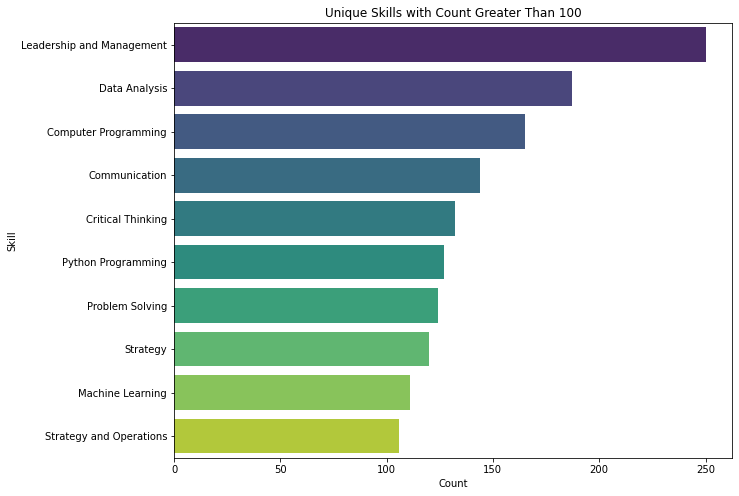

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_skills.values, y=filtered_skills.index, palette='viridis')
plt.title('Unique Skills with Count Greater Than 100')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

In [53]:

google_data = df[df['Company Offering'] == 'Google']

google_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

google_data_filtered = google_data[google_data['Skills Gained'].str.contains('|'.join(google_skills))]

skill_counts = google_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

print("Counts of skills offered by Google:")
for skill in google_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by Google:
Leadership and Management: 15
Data Analysis: 19
Computer Programming: 14


In [54]:
ibm_data = df[df['Company Offering'] == 'IBM']

ibm_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

ibm_data_filtered = ibm_data[ibm_data['Skills Gained'].str.contains('|'.join(ibm_skills))]

skill_counts = ibm_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()


print("Counts of skills offered by IBM:")
for skill in ibm_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by IBM:
Leadership and Management: 22
Data Analysis: 36
Computer Programming: 41


In [55]:

upenn_data = df[df['Company Offering'] == 'University of Pennsylvania']

upenn_skills = ['Leadership and Management', 'Data Analysis', 'Computer Programming']

upenn_data_filtered = upenn_data[upenn_data['Skills Gained'].str.contains('|'.join(upenn_skills))]

skill_counts = upenn_data_filtered['Skills Gained'].str.split(', ').explode().value_counts()

print("Counts of skills offered by University of Pennsylvania:")
for skill in upenn_skills:
    count = skill_counts.get(skill, 0)
    print(f"{skill}: {count}")


Counts of skills offered by University of Pennsylvania:
Leadership and Management: 19
Data Analysis: 12
Computer Programming: 7


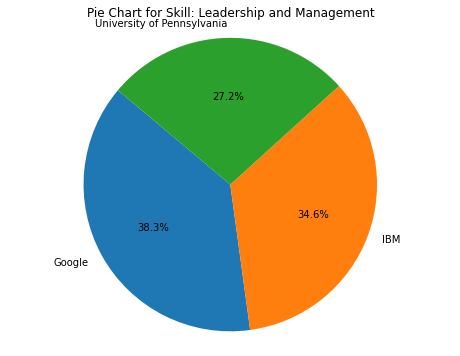

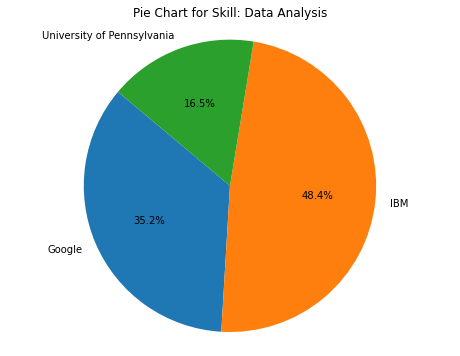

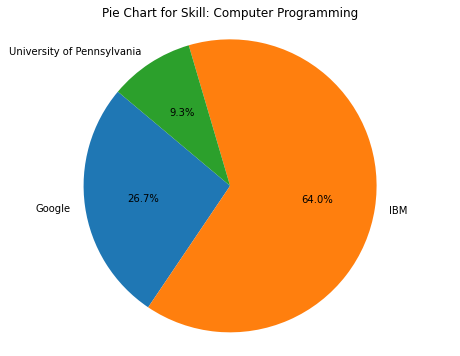

In [56]:
# requires modification

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Company Name': ['Google', 'Google', 'Google', 'IBM', 'IBM', 'IBM','University of Pennsylvania','University of Pennsylvania','University of Pennsylvania'],
    'Skill': ['Leadership and Management', 'Data Analysis', 'Computer Programming', 
              'Leadership and Management', 'Data Analysis', 'Computer Programming',
              'Leadership and Management', 'Data Analysis', 'Computer Programming'],
    'Count': [31,32,20,28,44,48,22,15,7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Unique skills with count greater than 100
filtered_skills = {
    'Leadership and Management': 331,
    'Data Analysis': 254,
    'Computer Programming': 204
}

# Plot pie chart for each skill
for skill, count in filtered_skills.items():
    # Filter data for the skill
    skill_data = df[df['Skill'] == skill]
    
    # Group data by company name and sum count
    skill_data_grouped = skill_data.groupby('Company Name')['Count'].sum()
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(skill_data_grouped, labels=skill_data_grouped.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for Skill: {skill}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):
Company: Google, Count of Ratings: 43
Company: DeepLearning.AI, Count of Ratings: 15
Company: University of Pennsylvania, Count of Ratings: 14
Company: IBM, Count of Ratings: 12
Company: University of Michigan, Count of Ratings: 9


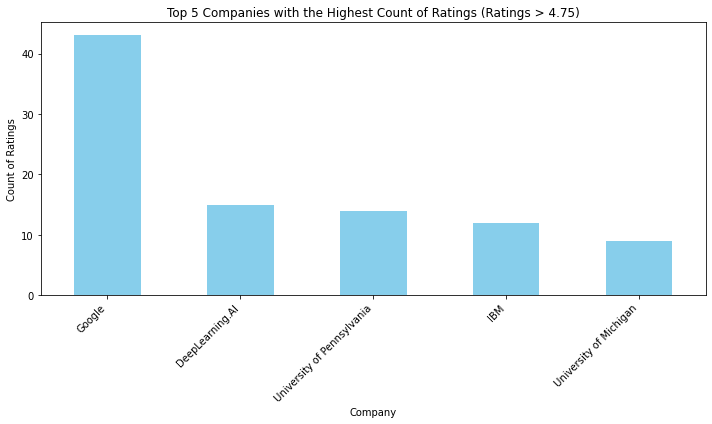

In [57]:

df = pd.read_csv('coursera_data.csv')

# Filter data for ratings greater than 4.75
high_rating_data = df[df['Ratings'] > 4.75]

# Group by company name and count ratings
company_rating_counts = high_rating_data.groupby('Company Offering')['Number of Ratings'].count()

# Sort companies by count of ratings and select top 5
top_companies = company_rating_counts.sort_values(ascending=False).head(5)

# Print top 5 companies and their count of ratings
print("Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75):")
for company, count in top_companies.items():
    print(f"Company: {company}, Count of Ratings: {count}")

    
# Create bar graph
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies with the Highest Count of Ratings (Ratings > 4.75)')
plt.xlabel('Company')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 5 skills offered by Google with ratings greater than 4.75 according to their count:
Data Analysis                11
Computer Programming         10
Leadership and Management    10
Python Programming            9
Communication                 9
Name: Skills Gained, dtype: int64


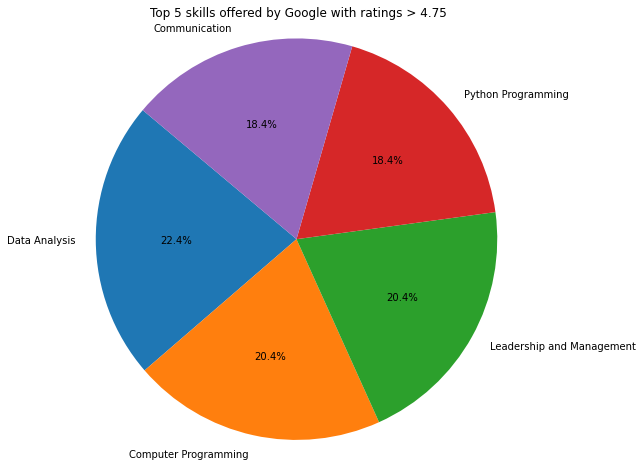

In [58]:

df = pd.read_csv('coursera_data.csv')

# Filter data for Google company
google_data = df[df['Company Offering'] == 'Google']

# Filter Google's data for ratings greater than 4.75
google_high_rating_data = google_data[google_data['Ratings'] > 4.75]

# Extract all skills offered by Google with high ratings
google_skills_high_rating = google_high_rating_data['Skills Gained'].str.split(', ').explode()

# Count occurrences of each skill
skill_counts = google_skills_high_rating.value_counts()

# Get the top 5 skills
top_skills = skill_counts.head(5)

# Print the top 5 skills
print("Top 5 skills offered by Google with ratings greater than 4.75 according to their count:")
print(top_skills)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_skills, labels=top_skills.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 skills offered by Google with ratings > 4.75')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()